Definition: SVM stands for Support Vector Machine



IMPORTS: 

In [21]:
import numpy as np
from collections import Counter
from sklearn.datasets import make_blobs
from matplotlib import pyplot as plt

DATASET CREATION: 

In [23]:
# define dataset
X, y = make_blobs(n_samples=50, centers=2) #makeblob generates a dataset of "centers" classes, random state
for feature in y:
     if feature == 0 :
         
         indice=np.where(y==0)
         y[indice]=-1
     else:
         continue

No handles with labels found to put in legend.
Counter({1: 25, -1: 25})
[1.88091288 7.99999618] 1
[-0.30835566  7.44386451] 1
[-0.55696793  7.78214868] 1
[2.20113127 4.49632457] -1
[2.87602661 4.13928176] -1
[2.72218668 4.7493999 ] -1
[4.60939344 4.01531147] -1
[1.5506562  2.66581108] -1
[0.18619481 5.41183299] 1
[4.07838318 5.24661407] -1
[-0.24320796  6.8788044 ] 1
[3.2629175  3.31902159] -1
[4.04995616 4.58454087] -1
[1.22728226 3.36944965] -1
[-1.69987198  6.84671448] 1
[3.09272104 2.33854448] -1
[-1.1162168   6.21807183] 1
[3.83776009 3.59275812] -1
[0.38394831 9.09376218] 1
[3.14176891 3.48268039] -1
[3.45337198 4.1047449 ] -1
[0.0089128  7.65675714] 1
[2.92256562 4.07152724] -1
[-2.09804937  6.35541472] 1
[2.4601553  4.43960532] -1
[-1.53479222  6.90132537] 1
[-0.68006653  7.6476377 ] 1
[-2.02897728  7.33493842] 1
[-0.98869189  7.85275652] 1
[2.09492685 4.70352714] -1
[-1.14916063  8.48661406] 1
[4.16790459 4.09977572] -1
[-1.63848761  6.97116167] 1
[-1.89198643  7.84794044] 1
[

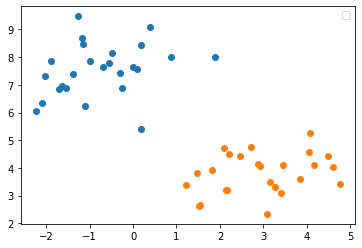

In [24]:
counter = Counter(y)
print(counter)
# summarize first few examples
for i in range(len(X)):
	print(X[i], y[i])
    
for label, _ in counter.items():
# for label in y:
	row_ix = np.where(y == label)[0]
	plt.scatter(X[row_ix, 0], X[row_ix, 1])
plt.legend()
plt.show()


In [25]:
#lets perform stochastic gradient descent to learn the seperating hyperplane between both classes

def svm_gradient_decent_plot(X, Y):
    #Initialize our SVMs weight vector with zeros (2 values)
    w = np.zeros(len(X[0])) #zeros
    #taux d'apprentissage
    eta = 1
    #nombre d'époques
    epochs = 10000
    #vecteur d'erreur
    errors = []

    #training part, gradient descent part
    for epoch in range(1,epochs):
        print("Epoch no. " + str(epoch))
        error = 0
        for i, x in enumerate(X):
            #misclassification
            if (Y[i]*np.dot(X[i], w)) < 1:
                #misclassified update for ours weights
                w = w + eta * ( (X[i] * Y[i]) + (-2  *(1/epoch)* w) )
                error = 1
            else:
                #correct classification, update our weights
                w = w + eta * (-2  *(1/epoch)* w)
        errors.append(error)
        

    #lets plot the rate of classification errors during training for our SVM
    plt.plot(errors,'+')
    plt.ylim(0.5,1.5)
    plt.axes().set_yticklabels([])
    plt.xlabel('Epoch')
    plt.ylabel('Misclassified ')
    plt.show()
    
    return w



8666
Epoch no. 8667
Epoch no. 8668
Epoch no. 8669
Epoch no. 8670
Epoch no. 8671
Epoch no. 8672
Epoch no. 8673
Epoch no. 8674
Epoch no. 8675
Epoch no. 8676
Epoch no. 8677
Epoch no. 8678
Epoch no. 8679
Epoch no. 8680
Epoch no. 8681
Epoch no. 8682
Epoch no. 8683
Epoch no. 8684
Epoch no. 8685
Epoch no. 8686
Epoch no. 8687
Epoch no. 8688
Epoch no. 8689
Epoch no. 8690
Epoch no. 8691
Epoch no. 8692
Epoch no. 8693
Epoch no. 8694
Epoch no. 8695
Epoch no. 8696
Epoch no. 8697
Epoch no. 8698
Epoch no. 8699
Epoch no. 8700
Epoch no. 8701
Epoch no. 8702
Epoch no. 8703
Epoch no. 8704
Epoch no. 8705
Epoch no. 8706
Epoch no. 8707
Epoch no. 8708
Epoch no. 8709
Epoch no. 8710
Epoch no. 8711
Epoch no. 8712
Epoch no. 8713
Epoch no. 8714
Epoch no. 8715
Epoch no. 8716
Epoch no. 8717
Epoch no. 8718
Epoch no. 8719
Epoch no. 8720
Epoch no. 8721
Epoch no. 8722
Epoch no. 8723
Epoch no. 8724
Epoch no. 8725
Epoch no. 8726
Epoch no. 8727
Epoch no. 8728
Epoch no. 8729
Epoch no. 8730
Epoch no. 8731
Epoch no. 8732
Epoch

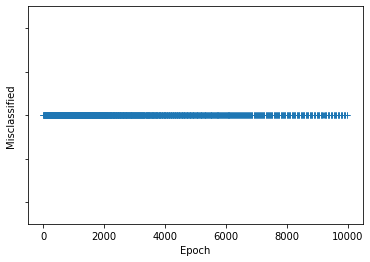

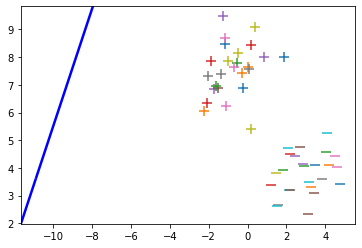

In [26]:
w = svm_gradient_decent_plot(X,y)

for d, sample in enumerate(X):
    
    # Plot the negative points
    if y[d]<0:
        plt.scatter(sample[0], sample[1], s=120, marker='_', linewidths=2)
    # Plot the positivecoordinates
    else:
        plt.scatter(sample[0], sample[1], s=120, marker='+', linewidths=2)


# # Poids de l'hyperplan
x2=[w[0],w[1],-w[1],w[0]]
x3=[w[0],w[1],w[1],-w[0]]

x2x3 =np.array([x2,x3])
X,Y,U,V = zip(*x2x3)

ax = plt.gca()
ax.quiver(X,Y,U,V,scale=1, color='blue')
plt.show()